# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


In [1]:
%matplotlib inline
import pandas as pd
import os
def getAngles(p):
    base = os.path.basename(p)
    base = os.path.splitext(base)[0]
    base = base.replace("+", "_+").replace("-", "_-")
    f = base.split("_")
    return f[-2:]
    



In [2]:
import resnet_ssd_face_python_file
import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")

In [3]:
names.sort()
resnet_ssd_face_python_file.processDatabase(dataset, names)

# headPose dataset の検出処理後のデータ解析

     name  angles  pitch  yaws
num                           
1    2790    2790   2790  2790
     name  angles  pitch  yaws
num                           
1       1       1      1     1


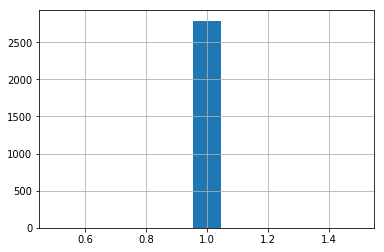

In [3]:
import pandas as pd
df = pd.read_csv("log_headPose_0.csv")

pitches = []
yaws = []
angles = []
for index, rows in df.iterrows():
#    print index, rows["name"]
    pitch, yaw = getAngles(rows["name"])
    pitches.append(float(pitch))    
    yaws.append(float(yaw))    
    angles.append("%s_%s" % (pitch, yaw))

df["angles"] = angles
df["pitch"] = pitches
df["yaws"] = yaws
df["num"].hist(bins=11)
print df.groupby("num").count()
print df.groupby("num").count()/float(df.shape[0])
#print df.groupby("angles", "num").count()



In [4]:
print df.groupby("angles").count()

         name  num  pitch  yaws
angles                         
+0_+0      30   30     30    30
+0_+15     30   30     30    30
+0_+30     30   30     30    30
+0_+45     30   30     30    30
+0_+60     30   30     30    30
+0_+75     30   30     30    30
+0_+90     30   30     30    30
+0_-15     30   30     30    30
+0_-30     30   30     30    30
+0_-45     30   30     30    30
+0_-60     30   30     30    30
+0_-75     30   30     30    30
+0_-90     30   30     30    30
+15_+0     30   30     30    30
+15_+15    30   30     30    30
+15_+30    30   30     30    30
+15_+45    30   30     30    30
+15_+60    30   30     30    30
+15_+75    30   30     30    30
+15_+90    30   30     30    30
+15_-15    30   30     30    30
+15_-30    30   30     30    30
+15_-45    30   30     30    30
+15_-60    30   30     30    30
+15_-75    30   30     30    30
+15_-90    30   30     30    30
+30_+0     30   30     30    30
+30_+15    30   30     30    30
+30_+30    30   30     30    30
+30_+45 

In [5]:
print df.groupby("angles").mean()

         num  pitch  yaws
angles                   
+0_+0      1      0     0
+0_+15     1      0    15
+0_+30     1      0    30
+0_+45     1      0    45
+0_+60     1      0    60
+0_+75     1      0    75
+0_+90     1      0    90
+0_-15     1      0   -15
+0_-30     1      0   -30
+0_-45     1      0   -45
+0_-60     1      0   -60
+0_-75     1      0   -75
+0_-90     1      0   -90
+15_+0     1     15     0
+15_+15    1     15    15
+15_+30    1     15    30
+15_+45    1     15    45
+15_+60    1     15    60
+15_+75    1     15    75
+15_+90    1     15    90
+15_-15    1     15   -15
+15_-30    1     15   -30
+15_-45    1     15   -45
+15_-60    1     15   -60
+15_-75    1     15   -75
+15_-90    1     15   -90
+30_+0     1     30     0
+30_+15    1     30    15
+30_+30    1     30    30
+30_+45    1     30    45
...      ...    ...   ...
-15_-60    1    -15   -60
-15_-75    1    -15   -75
-15_-90    1    -15   -90
-30_+0     1    -30     0
-30_+15    1    -30    15
-30_+30    1

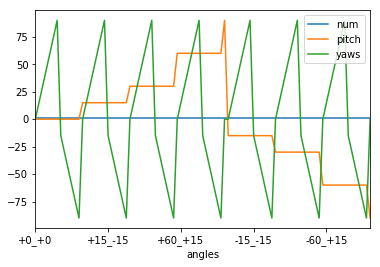

In [6]:
df.groupby("angles").mean().plot()

In [7]:
table = df.groupby("angles").mean()
print table

         num  pitch  yaws
angles                   
+0_+0      1      0     0
+0_+15     1      0    15
+0_+30     1      0    30
+0_+45     1      0    45
+0_+60     1      0    60
+0_+75     1      0    75
+0_+90     1      0    90
+0_-15     1      0   -15
+0_-30     1      0   -30
+0_-45     1      0   -45
+0_-60     1      0   -60
+0_-75     1      0   -75
+0_-90     1      0   -90
+15_+0     1     15     0
+15_+15    1     15    15
+15_+30    1     15    30
+15_+45    1     15    45
+15_+60    1     15    60
+15_+75    1     15    75
+15_+90    1     15    90
+15_-15    1     15   -15
+15_-30    1     15   -30
+15_-45    1     15   -45
+15_-60    1     15   -60
+15_-75    1     15   -75
+15_-90    1     15   -90
+30_+0     1     30     0
+30_+15    1     30    15
+30_+30    1     30    30
+30_+45    1     30    45
...      ...    ...   ...
-15_-60    1    -15   -60
-15_-75    1    -15   -75
-15_-90    1    -15   -90
-30_+0     1    -30     0
-30_+15    1    -30    15
-30_+30    1

In [8]:
table.to_csv("table.csv")

In [9]:
table.sort_values("num")

,num,pitch,yaws
angles,,,
+0_+0,1,0,0
-30_+0,1,-30,0
-15_-90,1,-15,-90
-15_-75,1,-15,-75
-15_-60,1,-15,-60
-15_-45,1,-15,-45
-15_-30,1,-15,-30
-15_-15,1,-15,-15
-15_+90,1,-15,90


In [10]:
X = table["yaws"]
Y = table["pitch"]
Z = table["num"]


import pylab as plt
plt.contour(X, Y, Z)

import numpy as np

yawsAr = np.array((-90, -75, -60, -45, -30, -15, 0,15,30,45,60,75,90))


pitchsAr = np.array((-60, -45, -30, -15, 0, 15, 30, 45, 60))

X, Y = np.meshgrid(yawsAr, pitchesAr)


In [11]:
df["num"].mean()


1.0

In [12]:
print df[df["num"]==0]


Empty DataFrame
Columns: [name, num, angles, pitch, yaws]
Index: []


pitch　が 90 のデータは検出されていないものが多いことがわかる。

In [14]:
print df[df["pitch"]==90]

                                        name  num  truePositives  \
92    headPose/Person01/person01192+90+0.jpg    0              0   
185   headPose/Person01/person01292+90+0.jpg    1              1   
278   headPose/Person02/person02192+90+0.jpg    1              1   
371   headPose/Person02/person02292+90+0.jpg    1              1   
464   headPose/Person03/person03192+90+0.jpg    0              0   
557   headPose/Person03/person03292+90+0.jpg    0              0   
650   headPose/Person04/person04192+90+0.jpg    1              1   
743   headPose/Person04/person04292+90+0.jpg    1              1   
836   headPose/Person05/person05192+90+0.jpg    0              0   
929   headPose/Person05/person05292+90+0.jpg    1              1   
1022  headPose/Person06/person06192+90+0.jpg    0              0   
1115  headPose/Person06/person06292+90+0.jpg    0              0   
1208  headPose/Person07/person07192+90+0.jpg    1              1   
1301  headPose/Person07/person07292+90+0.jpg    

In [15]:
print df[df["pitch"]==90].groupby("num").count()

     name  truePositives  falsePositives  angles  pitch  yaws
num                                                          
0      17             17              17      17     17    17
1      12             12              12      12     12    12
2       1              1               1       1      1     1


30 枚中の17 枚で検出がなかったことを示している。


In [16]:
print df[df["num"]==2]


                                         name  num  truePositives  \
19    headPose/Person01/person01119-30-15.jpg    2              1   
20     headPose/Person01/person01120-30+0.jpg    2              1   
21    headPose/Person01/person01121-30+15.jpg    2              1   
282   headPose/Person02/person02203-60-60.jpg    2              1   
286    headPose/Person02/person02207-60+0.jpg    2              1   
287   headPose/Person02/person02208-60+15.jpg    2              1   
289   headPose/Person02/person02210-60+45.jpg    2              1   
294   headPose/Person02/person02215-30-75.jpg    2              1   
295   headPose/Person02/person02216-30-60.jpg    2              1   
296   headPose/Person02/person02217-30-45.jpg    2              1   
297   headPose/Person02/person02218-30-30.jpg    2              1   
298   headPose/Person02/person02219-30-15.jpg    2              1   
299    headPose/Person02/person02220-30+0.jpg    2              1   
300   headPose/Person02/person0222

In [17]:
print df["truePositives"]

0       0
1       1
2       1
3       0
4       1
5       0
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2760    1
2761    1
2762    1
2763    1
2764    1
2765    1
2766    1
2767    1
2768    1
2769    1
2770    1
2771    1
2772    1
2773    1
2774    1
2775    1
2776    1
2777    1
2778    1
2779    1
2780    1
2781    1
2782    1
2783    1
2784    1
2785    1
2786    1
2787    1
2788    1
2789    1
Name: truePositives, dtype: int64


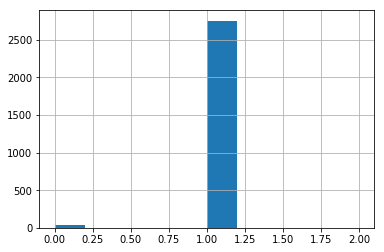

In [18]:
df["truePositives"].hist()

In [19]:
df.shape


(2790, 7)

In [20]:
print df.groupby("truePositives").count()

               name   num  falsePositives  angles  pitch  yaws
truePositives                                                 
0                35    35              35      35     35    35
1              2754  2754            2754    2754   2754  2754
2                 1     1               1       1      1     1


In [21]:
2754/2790.0


0.9870967741935484

In [22]:
df[df["truePositives"]==0].count()

name              35
num               35
truePositives     35
falsePositives    35
angles            35
pitch             35
yaws              35
dtype: int64

In [23]:
df[df["truePositives"]==0].count()/float(df.shape[0])


name              0.012545
num               0.012545
truePositives     0.012545
falsePositives    0.012545
angles            0.012545
pitch             0.012545
yaws              0.012545
dtype: float64

未検出は 1.25% である。

In [24]:
df[df["truePositives"]==0]


,name,num,truePositives,falsePositives,angles,pitch,yaws
0,headPose/Person01/person01100-90+0.jpg,0,0,0,-90_+0,-90,0
3,headPose/Person01/person01103-60-60.jpg,0,0,0,-60_-60,-60,-60
5,headPose/Person01/person01105-60-30.jpg,0,0,0,-60_-30,-60,-30
92,headPose/Person01/person01192+90+0.jpg,0,0,0,+90_+0,90,0
279,headPose/Person02/person02200-90+0.jpg,0,0,0,-90_+0,-90,0
372,headPose/Person03/person03100-90+0.jpg,0,0,0,-90_+0,-90,0
464,headPose/Person03/person03192+90+0.jpg,0,0,0,+90_+0,90,0
465,headPose/Person03/person03200-90+0.jpg,0,0,0,-90_+0,-90,0
557,headPose/Person03/person03292+90+0.jpg,0,0,0,+90_+0,90,0
744,headPose/Person05/person05100-90+0.jpg,0,0,0,-90_+0,-90,0
